# Chapter 2: Data and Sampling Distributions

## Libraries

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Random sampling and sample bias

- Sample:
    - A subset from a lager data set.
- Population:
    - The larger data set or idea of a data set.
- $N(n)$:
    - The size of population (sample).
- Random sampling:
    - Drawing elements into a sample at random.
- Stratified sampling:
    - Dividing the population into strata and randomly sampling from each strata.
- Stratum (pl. strata):
    - A homogeneous subgroup of a population with common characteristics.
- Simple random sample:
    - The sample that results from random sampling without stratifying the population.
- Bias:
    - Systematic error.
- Sample bias:
    - A sample that misrepresents the population.

## Sample mean vs. population mean
- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be prohibitively expensive.


## Selection bias

- Selection bias:
    - Bias resulting from the way in which observations are selected.
- Data snooping:
    - Extensive hunting through data in search of something interesting.
- Vast search effect:
    - Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

## Regression to the mean

- Specifying a hypothesis and then collecting data following randomization and random sampling principles ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## Sampling distribution of a statistic

- Sample statistic:
    - A metric calculated for a sample of data drawn from a larger population.
- Data distribution:
    - The frequency distribution of individual values in a data set.
- Sampling distribution:
    - The frequency distribution of a sample statistic over many samples or resamples.
- Central limit theorem:
    - The tendency of the sampling distribution to take on a normal shape as sample size rises.
- Standard error:
    - The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).


It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution.

In [6]:
df_loans = pd.read_csv('../data/loans_income.csv').squeeze('columns')
df_loans.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [7]:
sample_data = pd.DataFrame({
    'income' : df_loans.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [df_loans.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [df_loans.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results

,income,type
1769,40000.00,Data
19995,110000.00,Data
35057,60000.00,Data
16457,109000.00,Data
4661,58000.00,Data
...,...,...
995,70294.40,Mean of 20
996,57803.50,Mean of 20
997,65137.40,Mean of 20
998,68749.90,Mean of 20


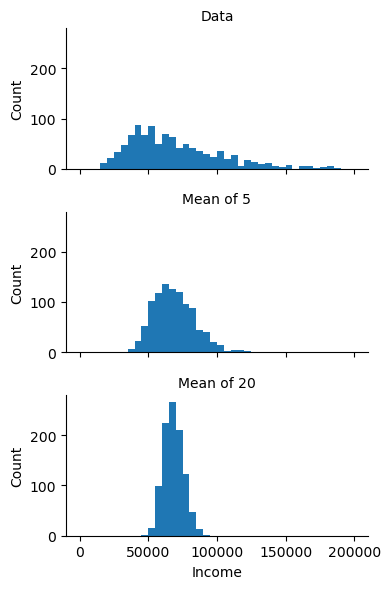

In [8]:
%%capture --no-display

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
g.tight_layout()

plt.show()

### Central limit theorem

- The mean drawn from multiple samples from a source will be familiar bell-shaped normal curve.
- Even if the source population isn't a normal distribution:
    - Since the sample size is large enough.
    - The data deviation isn't large.
- Allows formulas of normal-approximation like t-distributions.

### Standart error

- Sums up the variability in the sampling distribution.
- Can be estimated using the standart deviation $s$.
$$
    \text{Standart error} = SE = \frac{s}{\sqrt{n}}
$$
- Decrease with the sample size.


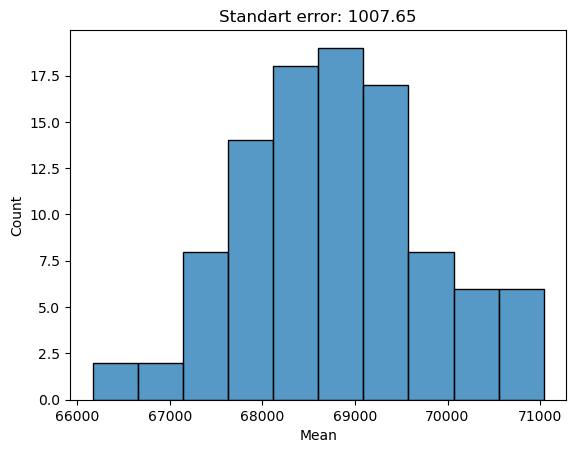

In [60]:
%%capture --no-display

df_loans_mean = {}
for i in range(100):
    bootstrap_sample = df_loans.sample(n=1000, replace=True, random_state=i)
    df_loans_mean[i] = bootstrap_sample.mean()

df_loans_mean = pd.Series(df_loans_mean, name='Mean')

sns.histplot(df_loans_mean, bins=10)

plt.title(f'Standart error: {df_loans_mean.std():.2f}')
plt.show()

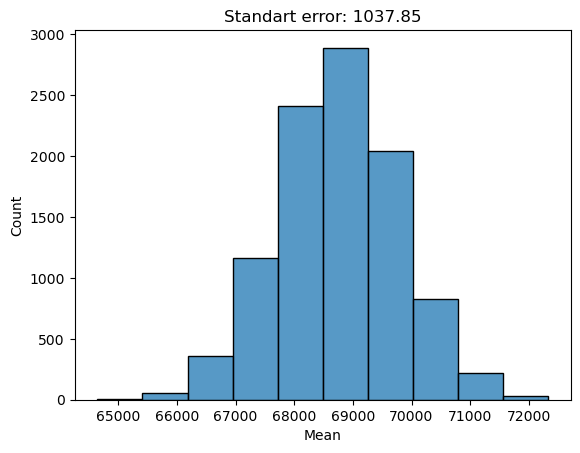

In [59]:
%%capture --no-display

df_loans_mean = {}
for i in range(10000):
    bootstrap_sample = df_loans.sample(n=1000, replace=True, random_state=i)
    df_loans_mean[i] = bootstrap_sample.mean()

df_loans_mean = pd.Series(df_loans_mean, name='Mean')

sns.histplot(df_loans_mean, bins=10)

plt.title(f'Standart error: {df_loans_mean.std():.2f}')
plt.show()

## Bootsrap